# The Hartree-Fock Self-Consistent Field Procedure

Hartree-Fock theory holds a special place in quantum chemistry, as it forms the mathematical foundation for molecular orbital theory, and it is also a starting point for many other, more sophisticated electronic structure theories.  This project provides an overview of the theoretical aspects of the Hartree-Fock approach and a detailed derivation of the Hartree-Fock-Roothaan equations. Python code for an unrestricted Hartree-Fock solver is provided, with all of the required integrals taken from the Psi4 electronic structure package. The project also covers some of the numerical aspects of Hartree-Fock theory, including convergence accelaration (using the direct inversion of the iterative subspace [DIIS]), convergence to the complete basis set limit, and spin-symmetry breaking. 

## The Electronic Hamiltonian

Throughout this project, we work within the Born-Oppenheimer approximation and consider only the electronic part of the Hamiltonian:

$$\hat{H} = \hat{T}_{\rm e} + \hat{V}_{\rm en} + \hat{V}_{\rm ee}$$

Here, 

$$\hat{T}_{\rm e} = -\frac{1}{2}\sum_i \nabla_i^2$$

is the kinetic energy operator for all electrons, $i$, 

$$\hat{V}_{\rm en} = -\sum_i \sum_A \frac{Z_A}{|r_i - r_A|}$$

is the potential energy operator describing the interation between each electron, $i$ and nucleus, $A$, with nuclear charge, $Z_A$, and 

$$\hat{V}_{\rm ee} = \frac{1}{2}\sum_{i \neq j}\frac{1}{|r_i - r_j|}$$ 

is the operator corresponding to the repulsion between electrons $i$ and $j$. 

## Slater Determinants

Hartree-Fock theory is an example of a variational approach to solving the Schrödinger equation. The variation theorem states that, for any approximate wave function, $\psi$, that satisfies the boundary conditions for the system under investigation, the expectation value of the Hamiltonian,

$$W = \frac{ \langle \psi \vert \hat{H} \vert \psi \rangle }{\langle \psi \vert \psi \rangle} $$

is guaranteed to be an upper bound to the true ground-state energy. This theorem gives us a powerful approach for finding approximate solutions to the Schrödinger equation. One can choose a functional form for $\psi$ that contains some parameters, and the parameters can be chosen such that they minimize $W$. 

In the Hartree-Fock approach, $\psi$ is chosen to be a normalized, antisymmetrized product of one-electron functions called orbitals. Such a wave function is often referred to as a Slater determinant. For a two-electron system, with spin and spatial coordinates ${\bf x}_1$ and ${\bf x}_2$ and molecular spin-orbitals $\phi_1$ and $\phi_2$, the Slater deterninant can be expressed as

$$ \psi({\bf x}_1, {\bf x}_2) = \frac{1}{\sqrt{2}}\begin{vmatrix} \phi_1({\bf x}_1) & \phi_2({\bf x}_1) \\ \phi_1({\bf x}_2) & \phi_2({\bf x}_2) \end{vmatrix} = \frac{1}{\sqrt{2}} \left [\phi_1({\bf x}_1) \phi_2({\bf x}_2) - \phi_1({\bf x}_2) \phi_2({\bf x}_1) \right]  $$

This form guarantees that the wave function satisfies the Pauli principle, which states that the wave function is antisymmetric with respect to the exchange of electron coordinates ${\bf x}_1$ and ${\bf x}_2$. As a consequence, the wave function will vanish if the electrons occupied the same spin orbital (the Pauli exclusion principle).  For a general, $N$-electron system, the Slater determinant takes the form

$$ \psi({\bf x}_1, {\bf x}_2, ..., {\bf x}_N) = \frac{1}{\sqrt{N!}}\begin{vmatrix} \phi_1({\bf x}_1) & \phi_2({\bf x}_1) & ... & \phi_N({\bf x}_1) \\ \phi_1({\bf x}_2) & \phi_2({\bf x}_2) & ... & \phi_N({\bf x}_2) \\ \vdots & \vdots & \ddots & \vdots \\ \phi_1({\bf x}_N) & ... & ... & \phi_N({\bf x}_N) \end{vmatrix}   $$

If you have ever evaluated a determinant larger than $2 \times 2$, you will realize that dealing with determinants of large numbers of orbitals could be extremely tedious. Fortunately, we do not need to deal directly with the determinants as mathematical objects. Rather, we only need to understand how to evaluate integrals over determinants, and the [Slater-Condon rules](https://en.wikipedia.org/wiki/Slater–Condon_rules) tell us everything we need to know. In Hartree-Fock theory, the only relevant rules are the ones for evaluating the expectation value one-body ($\hat{T}_{\rm e}$ and $\hat{V}_{\rm en}$) and two-body ($\hat{V}_{\rm ee}$) operators with respect to the Slater determinant, $\psi$. We have

$$\langle \psi | \hat{H} | \psi \rangle = \sum_i \langle \phi_i | \hat{T}_{\rm e} | \phi_i \rangle + \sum_i \langle \phi_i | \hat{V}_{\rm en} | \phi_i \rangle + \frac{1}{2} \sum_{ij} \left ( [ii|jj] - [ij|ji] \right ) $$

where 

$$[pr|qs] = \int d{\bf x}_1 \int d{\bf x}_2 \phi_p^*({\bf x}_1)\phi_r({\bf x}_1) \frac{1}{r_{12}} \phi^*_q({\bf x}_2)\phi_s({\bf x}_2)$$

Note that we have dropped the denominator on the expectation value because we will require that the molecular orbitals be orthonormalized, in which case the wave function will automatically be normalized, i.e., $\langle \psi | \psi \rangle = 1$. Note also that all of the sums here involve only the occupied molecular orbitals. In general, we use the labels $i$, $j$, $k$, $l$, ... to denote occupied molecular orbitals, $a$, $b$, $c$, $d$,... to denote virtual / unoccupied molecular orbitals, and $p$, $q$, $r$, and $s$ to denote general molecular orbitals.

## The Hartree-Fock-Roothaan equations

To obtain the Hartree-Fock-Roothaan equations, we first expand the molecular orbitals (MOs), $\{\phi\}$, in a basis of known functions, $\{\chi\},$

$$\phi_i({\bf x}_1) = \sum_\mu c_{\mu i} \chi_\mu({\bf x}_1) $$

Here, $\mu$ refers to a basis function, and $c_{\mu i}$ is an MO expansion coefficient, which we will assume is real-valued. The expansion coefficients can be obtained with the help of the variation theorem. We would like to find MO coefficients that minimize the expectation value of the Hamiltonian, but we would also like the resulting MOs to be orthonormalized. So, rather than minimizing $W = \langle \psi | \hat{H} | \psi \rangle$ directly, we use Lagrange's method of undetermined multipliers and minimize the Lagrangian,

$$\mathcal{L} = \langle \psi | \hat{H} | \psi \rangle - \sum_{ij} \epsilon_{ij} (\langle \phi_i | \phi_j \rangle - \delta_{ij})$$

where $\epsilon_{ij}$ are Lagrange multipliers and $\delta_{ij}$ is the Kronecker delta function. 

As discussed above, the Slater-Condon rules can be used to define the expectation value of the Hamiltonian with respect to $\psi$. When the MOs are expanded in terms of the basis functions, $\{\chi\}$, the resulting expressions involve integrals over the basis functions. For example, 

$$ 
\begin{align}
\langle \psi | \hat{T} | \psi \rangle &= \sum_i \langle \phi_i | \hat{T}_{\rm e} | \phi_i \rangle \\
&= \sum_{\mu \nu} \sum_i c_{\mu i}c_{\nu i} \langle \chi_\mu | \hat{T} | \chi_\nu \rangle \\
&= \sum_{\mu \nu} D_{\mu\nu} T_{\mu\nu} 
\end{align}
$$

Here, we have introduced the matrix notation for the kinetic energy operator, $T_{\mu\nu} = \langle \chi_\mu | \hat{T} | \chi_\nu \rangle$, for which we have dropped the subscript "e". We have also introduced the density matrix, which is defined as

$$ D_{\mu\nu} = \sum_i c_{\mu i}c_{\nu i} $$

Similarly, 

$$ 
\begin{align}
\langle \psi | \hat{V}_{\rm en} | \psi \rangle &= \sum_i \langle \phi_i | \hat{V}_{\rm en} | \phi_i \rangle \\
&= \sum_{\mu \nu} \sum_i c_{\mu i}c_{\nu i} \langle \chi_\mu | \hat{V}_{\rm en} | \chi_\nu \rangle\\
&= \sum_{\mu \nu} D_{\mu\nu} V_{\mu\nu} 
\end{align}
$$

where in the matrix notation for $\hat{V}_{\rm en}$, we have dropped the subscript "en". For the electron-electron repulsion term, we have

$$ 
\begin{align}
\langle \psi | \hat{V}_{\rm ee} | \psi \rangle &= \frac{1}{2}\sum_{\mu \nu \lambda \sigma} \sum_{ij} c_{\mu i}c_{\lambda j}c_{\nu i} c_{\sigma i} \left ( [\mu\nu|\lambda\sigma] - [\mu\sigma|\lambda\nu] \right ) \\
&= \frac{1}{2}\sum_{\mu \nu \lambda \sigma} D_{\mu\nu} D_{\lambda \sigma} \left ( [\mu\nu|\lambda\sigma] - [\mu\sigma|\lambda\nu] \right ) 
\end{align}
$$

The electron repulsion integrals over basis functions are defined similarly to the integrals over molecular orbitals given above, i.e.,
$$[\mu\nu|\lambda\sigma] = \int d{\bf x}_1 \int d{\bf x}_2 \chi_\mu^*({\bf x}_1)\chi_\nu({\bf x}_1) \frac{1}{r_{12}} \chi^*_\lambda({\bf x}_2)\chi_\sigma({\bf x}_2)$$

We next define the Coulomb matrix

$$J_{\mu\nu} = \sum_{\lambda \sigma} D_{\lambda\sigma} [\mu\nu|\lambda\sigma]$$

and the exchange matrix

$$K_{\mu\nu} = \sum_{\lambda \sigma} D_{\lambda\sigma} [\mu\sigma|\lambda\nu] $$

and the expectation value of $\hat{V}_{\rm ee}$ reduces to

$$ \langle \psi | \hat{V}_{\rm ee} | \psi \rangle = \frac{1}{2}\sum_{\mu \nu} D_{\mu\nu}(J_{\mu\nu} - K_{\mu\nu}) $$

At last, we have a compact expression for the expectation value of the electronic Hamiltonian with respect $\psi$

$$\langle \psi | \hat{H} | \psi \rangle = \frac{1}{2} \sum_{\mu\nu} D_{\mu\nu} (h_{\mu\nu} + F_{\mu\nu})$$

where we have introduced the core Hamiltonian matrix, $h_{\mu\nu} = T_{\mu\nu} + V_{\mu\nu}$, and the Fock matrix, $F_{\mu\nu} = h_{\mu\nu} + J_{\mu\nu} - K_{\mu\nu}$. We can insert this result into the Hartree-Fock Lagrangian, while also expanding the molecular orbitals in the overlap term to give

$$\mathcal{L} = \frac{1}{2} \sum_{\mu\nu} D_{\mu\nu} (h_{\mu\nu} + F_{\mu\nu}) -  \sum_{ij} \epsilon_{ij} (\sum_{\mu\nu} c_{\mu i} c_{\nu j} \langle \chi_\mu | \chi_\nu \rangle - \delta_{ij})$$

or

$$\mathcal{L} = \frac{1}{2} \sum_{\mu\nu} D_{\mu\nu} (h_{\mu\nu} + F_{\mu\nu}) -  \sum_{ij} \epsilon_{ij} (\sum_{\mu\nu} c_{\mu i} c_{\nu j} S_{\mu\nu} - \delta_{ij})$$

where $S_{\mu\nu} = \langle \chi_\mu | \chi_\nu \rangle$ is the overlap matrix.


Now, for the set of MO coefficients that minimize $\mathcal{L}$, the derivative of $\mathcal{L}$ with respect to these coefficients should vanish

$$\frac{\partial \mathcal{L}}{\partial c_{\gamma k}} = 0$$

Evaluating the left-hand side of this equation is straightforward but tedious. We have

$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial c_{\gamma k}} &=  \frac{\partial}{\partial c_{\gamma k}} \left [ \frac{1}{2} \sum_{\mu\nu} D_{\mu\nu} (h_{\mu\nu} + F_{\mu\nu}) -  \sum_{ij} \epsilon_{ij} (\sum_{\mu\nu} c_{\mu i} c_{\nu j} S_{\mu\nu} - \delta_{ij}) \right ] \\
& = \frac{1}{2} \sum_{\mu\nu} \frac{\partial D_{\mu\nu}}{\partial c_{\gamma k}} (h_{\mu\nu} + F_{\mu\nu}) + \frac{1}{2} \sum_{\mu\nu} D_{\mu\nu} \left ( \frac{\partial J_{\mu\nu}}{\partial c_{\gamma k}} - \frac{\partial K_{\mu\nu}}{\partial c_{\gamma k}} \right ) -  \sum_{ij} \epsilon_{ij} \sum_{\mu\nu} \frac{\partial}{\partial c_{\gamma k}}c_{\mu i} c_{\nu j} S_{\mu\nu}
\end{align}
$$
Because 
$$ \frac{\partial D_{\mu\nu}}{\partial c_{\gamma k}} = \frac{\partial}{\partial c_{\gamma k}} c_{\mu i}c_{\nu i} = \delta_{\gamma \mu} c_{\nu k} + \delta_{\gamma \nu} c_{\mu k}$$
the first term in $\frac{\partial \mathcal{L}}{\partial c_{\gamma k}}$ evaluates to 
$$\frac{1}{2} \sum_{\mu\nu} \frac{\partial D_{\mu\nu}}{\partial c_{\gamma k}} (h_{\mu\nu} + F_{\mu\nu}) = \sum_{\nu} \left ( h_{\gamma \nu} + F_{\gamma \nu} \right ) c_{\nu k}$$
where we have taken advantage of the fact that both the core Hamiltonian matrix and Fock matrix are symmetric. For the term involving the derivative of the Coulomb matrix, we have
$$ 
\begin{align}
\frac{1}{2} \sum_{\mu\nu} D_{\mu\nu} \frac{\partial J_{\mu\nu}}{\partial c_{\gamma k}} &= \frac{1}{2} \sum_{\lambda \sigma} \frac{\partial D_{\lambda \sigma}}{c_{\gamma k}} \sum_{\mu\nu} D_{\mu\nu}[\mu\nu|\lambda\sigma] \\
&= \frac{1}{2} \sum_{\lambda \sigma} \frac{\partial D_{\lambda \sigma}}{c_{\gamma k}} J_{\lambda\sigma} \\
&= \frac{1}{2} \sum_{\lambda \sigma} \left ( \delta_{\gamma \lambda} c_{\sigma k} + \delta_{\gamma \sigma} c_{\lambda k} \right ) J_{\lambda\sigma} \\
&= \frac{1}{2} \left ( \sum_{\sigma} c_{\sigma k} J_{\gamma \sigma} + \sum_{\lambda} c_{\lambda k} J_{\lambda \gamma} \right ) \\
& = \sum_{\sigma}  J_{\gamma \sigma} c_{\sigma k}
\end{align}
$$
where we have taken advantage of the symmetry possessed by both the two-electron integrals and the Coulomb matrix. Similarly, for the term involving the derivative of the exchange matrix, we have
$$ 
\begin{align}
-\frac{1}{2} \sum_{\mu\nu} D_{\mu\nu} \frac{\partial K_{\mu\nu}}{\partial c_{\gamma k}} &= \frac{1}{2} \sum_{\lambda \sigma} \frac{\partial D_{\lambda \sigma}}{c_{\gamma k}} \sum_{\mu\nu} D_{\mu\nu}[\mu\sigma|\lambda\nu] \\
&= -\frac{1}{2} \sum_{\lambda \sigma} \frac{\partial D_{\lambda \sigma}}{c_{\gamma k}} K_{\lambda\sigma} \\
&= -\frac{1}{2} \sum_{\lambda \sigma} \left ( \delta_{\gamma \lambda} c_{\sigma k} + \delta_{\gamma \sigma} c_{\lambda k} \right ) K_{\lambda\sigma} \\
&= -\frac{1}{2} \left ( \sum_{\sigma} c_{\sigma k} K_{\gamma \sigma} + \sum_{\lambda} c_{\lambda k} K_{\lambda \gamma} \right ) \\
& = -\sum_{\sigma}  K_{\gamma \sigma} c_{\sigma k}
\end{align}
$$
where, again, we have taken advantage of the symmetry possessed by both the two-electron integrals and the exchange matrix. Lastly, the term involving the overlap integrals is
$$
\begin{align}
-\sum_{ij} \epsilon_{ij} \sum_{\mu\nu} \frac{\partial}{\partial c_{\gamma k}}c_{\mu i} c_{\nu j} S_{\mu\nu} & = -\sum_{ij} \epsilon_{ij} \sum_{\mu\nu} S_{\mu\nu} \left ( \delta_{\mu\gamma}\delta_{ki} + \delta_{\nu\gamma}\delta_{kj} \right ) \\
& = -\sum_j \epsilon_{kj} \sum_\nu S_{\gamma \nu} c_{\nu j} - \sum_i \epsilon_{im} \sum_\mu S_{\mu\gamma} c_{\mu i} \\
& = -2 \sum_i \sum_\nu S_{\gamma \nu} c_{\nu i} \epsilon_{i k}
\end{align}
$$
where we have used the fact that the overlap integral matrix is symmetric. Combining each of these results and redefining some labels leads to 

$$\forall ~i, ~\mu: ~~~~\sum_\nu (h_{\mu\nu} + F_{\mu\nu})c_{\nu i} = \sum_\nu \sum_j S_{\mu\nu} c_{\nu j} \epsilon_{ji}$$

It turns out that this equation can be satisfied for many different Lagrange multipliers, so we choose to find the solution for which the matrix of multipliers is diagonal ($\epsilon_{ji} \to \delta_{ij}\epsilon_i$), giving us 

$$\forall ~i, ~\mu: ~~~~\sum_\nu (h_{\mu\nu} + F_{\mu\nu})c_{\nu i} = \epsilon_{i} \sum_\nu S_{\mu\nu} c_{\nu i} $$


This equation can be solved as a generalized eigenvalue problem

$$ {\bf F}{\bf c} = {\bf S}{\bf c}{\bf \epsilon}$$

where ${\bf \epsilon}$ is a diagonal matrix, and the entries on the diagonal are interpreted as the orbital energies. Note that, by solving this problem as a generalized eigenvalue problem, we obtain not only the set of occupied orbitals and orbital energies ($\phi_i$ and $\epsilon_i$) but also a set of unoccupied orbitals and energies ($\phi_a$ and $\epsilon_a$). While the unoccupied orbitals and orbital energies do not enter the energy expression for Hartree-Fock theory, we will need them for post-Hartree-Fock methods that capture electron correlation effects that are missing at the mean-field level.


## Spin and Unrestricted Hartree-Fock Theory

Above, we have buried the concept of spin except in noting that the electron coordinate, ${\bf x}$, represents both the spatial (${\bf r}$) and spin (${\bf \omega}$) coordinates. As such, the set of molecular orbitals, $\{\phi\}$ and basis functions $\{\chi\}$ implicitly spanned the space of both $\alpha$- and $\beta$-spin orbitals. In a practical implementation of the Hartree-Fock-Roothaan equations, it is more convenient to explicitly account for the spin of the electrons by separating the spin and spatial components of the molecular orbitals and expanding the spatial parts of the $\alpha$- and $\beta$-spin molecular orbitals in the same basis. So, we have

$$ \phi_i({\bf x}_1) = \phi_i^\sigma({\bf r}_1) \sigma(\omega_1)$$

where $\sigma(\omega_1)$ is a spin function and $\sigma\in\{\alpha, \beta\}$. Now, the spatial parts of these orbitals can be expanded as

$$\phi_i^\alpha({\bf r}_1) = \sum_\mu c^\alpha_{\mu i} \chi_\mu({\bf r}_1) $$

and

$$\phi_i^\beta({\bf r}_1) = \sum_\mu c^\beta_{\mu i} \chi_\mu({\bf r}_1) $$


In "restricted" Hartree-Fock theory, the $\alpha$- and $\beta$-spin molecular orbital coefficients are assumed to be the same. Here, we will implement "unrestricted" Hartree-Fock (UHF) theory, where $c^\alpha_{\mu i}$ and $c^\beta_{\mu i}$ can differ, but we stress that the basis of functions in which the molecular orbitals are expanded is the same for both spin cases.

All of the quantities introduced above can be redefined for the unrestricted spin case. The electronic energy (the expectation value of the Hamiltonian) is

$$E_{\rm electronic} = \frac{1}{2} \sum_{\mu\nu} D^\alpha_{\mu\nu} (h_{\mu\nu} + F^\alpha_{\mu\nu}) + \frac{1}{2} \sum_{\mu\nu} D^\beta_{\mu\nu} (h_{\mu\nu} + F^\beta_{\mu\nu})$$

where

$$ D^\alpha_{\mu\nu} = \sum_i^{N_\alpha} c^\alpha_{\mu i}c^\alpha_{\nu i} $$

and

$$ D^\beta_{\mu\nu} = \sum_i^{N_\beta} c^\beta_{\mu i}c^\beta_{\nu i} $$

are the $\alpha$- and $\beta$-spin density matrices. Note that the sums over occupied orbitals here run only over the orbitals with the appropriate spin. For the remainder of this tutorial, this notation will be suppressed, and the limits on the sums are implied by the quantities involved. We have also introduced $\alpha$- and $\beta$-spin Fock matrices, which are defined as

$$F^\alpha_{\mu\nu} = h_{\mu\nu} + J^\alpha_{\mu\nu} + J^\beta_{\mu\nu} - K^\alpha_{\mu\nu}$$

and

$$F^\beta_{\mu\nu} = h_{\mu\nu} + J^\alpha_{\mu\nu} + J^\beta_{\mu\nu} - K^\beta_{\mu\nu}$$

The Coulomb and exchange matrices are defined in an analogous way as above as

$$J^\alpha_{\mu\nu} = \sum_{\lambda \sigma} D^\alpha_{\lambda\sigma} (\mu\nu|\lambda\sigma)$$
$$J^\beta_{\mu\nu} = \sum_{\lambda \sigma} D^\beta_{\lambda\sigma} (\mu\nu|\lambda\sigma)$$
$$K^\alpha_{\mu\nu} = \sum_{\lambda \sigma} D^\alpha_{\lambda\sigma} (\mu\sigma|\lambda\nu) $$

and

$$K^\beta_{\mu\nu} = \sum_{\lambda \sigma} D^\beta_{\lambda\sigma} (\mu\sigma|\lambda\nu) $$

Note that we have changed the notation for the electron repulsion integrals slightly to reflect the fact that we use the same basis functions used to expand the $\alpha$- and $\beta$-spin orbitals. To be explicit, these electron repulsion integrals are now defined as integrals over only the spatial coordinates ${\bf r}_1$ and ${\bf r}_2$ as

$$(\mu\nu|\lambda\sigma) = \int d{\bf r}_1 \int d{\bf r}_2 \chi_\mu^*({\bf r}_1)\chi_\nu({\bf r}_1) \frac{1}{r_{12}} \chi^*_\lambda({\bf r}_2)\chi_\sigma({\bf r}_2)$$

Note also that no $\beta$-type exchange term shows up in the $\alpha$-spin Fock matrix (and vice versa) because such a term would be zero by spin symmetry. These cases were handled implicitly above where the electron repulsion integrals were defined as integrals over both spatial and spin coordintes; we need to be a little more careful here when handling spin explicitly.

## The UHF Procedure

Obtaining the molecular orbital coefficients from Hartee-Fock-Roothaan equations can be achieved by solving the generalized eigenvalue problem involving the Fock and overlap matrices. Since the Fock matrix depends on the orbitals, this procedure must be repeated until self-consistency (i.e., until the orbitals and energy stop changing between iteractions). The requirement of self-consistency is why Hartree-Fock is also referred to as a self-consistent field (SCF) theory. Here, we outline the SCF procedure and provide some Python code for each step.

### Step 1. Obtain Required Integrals

We will use the Psi4 electronic structure package to obtain the required integrals over the Hamiltonian and basis functions. In order to obtain these integrals, we will need to specify the molecular geometry and the set of basis functions in which the molecular orbitals are expanded ([the basis set](https://en.wikipedia.org/wiki/Basis_set_(chemistry))). In this tutorial, we will use the "cc-pVDZ" basis, which is a member of Dunning's correlation-consistent basis set family. Specifically, cc-pVDZ is contracted Gaussian-type basis set with a "double-$\zeta$" quality description of the valence orbitals (meaning there are two sets of contracted Gaussian functions for every valence orbital), plus a set of polarization functions (which have one higher angular momentum than the valence functions).

The function below will return all of the integrals, etc. that we will need to implement the SCF procedure. As input parameters, this function will require a Psi4 molecule object and an options dictionary.

In [1]:
import psi4
import numpy as np

def get_integrals(mol, options):
    """
    get integrals required for the SCF procedure from psi4

    :param mol: a psi4 molecule object
    :param options: an options dictionary for psi4

    :return nalpha: the number of alpha electrons
    :return nbeta: the number of beta electrons
    :return h: the core Hamiltonian matrix
    :return g: the two-electron repulsion integrals in chemists' notation
    :return S: the overlap matrix
    """

    # activate the molecule
    psi4.activate(mol)

    # set the options
    psi4.set_options(options)

    # suppress psi4 printing 
    psi4.core.be_quiet()

    # we need a wave function object to evaluate the integrals
    wfn = psi4.core.Wavefunction.build(mol, psi4.core.get_global_option('BASIS'))
    
    # get integrals from MintsHelper
    mints = psi4.core.MintsHelper(wfn.basisset())
    
    # kinetic energy
    T = np.asarray(mints.ao_kinetic())
    
    # electron-nucleus potential energy
    V = np.asarray(mints.ao_potential())

    # core Hamiltonian matrix
    h = T + V
    
    # overlap
    S = np.asarray(mints.ao_overlap())
    
    # two-electron integrals, g. these are stored in chemists' notation, (11|22)
    g = np.asarray(mints.ao_eri())
    
    # number of alpha and beta electrons
    nalpha = wfn.nalpha()
    nbeta = wfn.nbeta()

    return nalpha, nbeta, mol.nuclear_repulsion_energy(), T + V, g, S

Now, once we define a molecule and basis set, we can call this function to get all of the integrals we will need. This tutorial does not make use of molecular point-group symmetry, so be sure to set the point group to c1 when defining the molecule.

In [2]:
# define the molecule. be sure to disable point-group symmetry
mol = psi4.geometry("""
0 1
O
H 1 1.0
H 1 1.0 2 104.5
symmetry c1
""")

options = {'basis': 'cc-pvdz'}
nalpha, nbeta, enuc, h, g, S = get_integrals(mol, options)


### Step 2. Symmetric Orthogonalization

The Hartree-Fock-Roothaan equations are a generalized eigenvalue problem of the form

$$ {\bf F}^\sigma{\bf c}^\sigma = {\bf S}{\bf c}^\sigma{\bf \epsilon}^\sigma$$

where $\sigma \in \{\alpha, \beta \}$. It is possible to convert this problem into a standard eigenvalue problem by transforming to an orthogonal basis using Löwdin's symmetric orthogonalization procedure. One first finds a transformation that diagonalizes the overlap matrix, ${\bf S}$,

$$ {\bf s} = {\bf U}^T {\bf S} {\bf U} $$

where ${\bf s}$ is a diagonal matrix of eigenvalues. We then construct the symmetric orthogonalization matrix by taking the inverse square root of the eigenvalues and backtransforming them to the original basis:

$$ {\bf S}^{-1/2} = {\bf U} {\bf s}^{-1/2} {\bf U}^T $$


In [3]:
# diagonalize the overlap matrix
s, U = np.linalg.eigh(S)

# inverse square root of eigenvalues of S on the diagonals of a matrix
Shalf = np.diagflat(s**(-0.5))

# back transform to original basis
Shalf = U @ Shalf @ U.transpose()


### Step 3. Construct Guess Orbitals and Density

The UHF procedure must be seeded with some guess for the molecular orbital coefficients. The simplest guess is obtained by ignoring the Coulomb and exchange parts of the Fock matrices, which is known as a "core Hamiltonian" guess:

$$ F^\alpha_{\mu\nu} = F^\beta_{\mu\nu} \approx h_{\mu\nu}$$

Other, more sophisticated, guesses exist, and you can read more about them [here](https://psicode.org/psi4manual/master/scf.html#sec-scfguess). Once we have our initial Fock matrix, we bring it to the orthogonal basis using the transformation matrix defined above

$$ {\bf F}^{\sigma \prime} = ({\bf S}^{-1/2})^T {\bf F}^\sigma {\bf S}^{-1/2} $$

Now the Fock matrices can be diagonalized to obtain their eigenvectors

$$ {\bf F}^{\sigma \prime}{\bf c}^{\sigma \prime} = {\bf \epsilon}^\sigma {\bf c}^{\sigma \prime}$$

and one index of these eigenvectors can be back transformed to the original non-orthogonal basis to give the MO coefficient matrices

$$ {\bf c}^\sigma = {\bf S}^{-1/2} {\bf c}^{\sigma \prime} $$

With the MO coefficient matrices, we can construct the density matrices

$$ D^\sigma_{\mu\nu} = \sum_i c^\sigma_{\mu i}c^\sigma_{\nu i} $$


In [4]:
# core guess
F_a = h

# transform Fock matrix to the orthogonal basis
F_a = Shalf.transpose() @ F_a @ Shalf

# diaogonalize the Fock matrix
eps_a, c_a = np.linalg.eigh(F_a)

# back transform one index of the MO coefficient matrix to the non-orthogonal basis
c_a = Shalf @ c_a

# our guess for the alpha- and beta-spin MO coefficients is the same
c_b = c_a.copy()
F_b = F_a.copy()

# construct the density matrices. a slice over occupied orbitals might be useful here
oa = slice(None, nalpha)
ob = slice(None, nbeta)
D_a = np.einsum('pi,qi->pq', c_a[:, oa], c_a[:, oa])
D_b = np.einsum('pi,qi->pq', c_b[:, ob], c_b[:, ob])


### Step 4. Iterating Toward Convergence

As mentioned above, the Roothaan equations must be solved until self consistency. Below, we iteratively solve the equations until the change in the energy between iterations $k$ and $k+1$ 

$$ \Delta E = |E_{k+1} - E_{k}| $$

and the change in the density matrix between iterations $k$ and $k+1$ 

$$ \Delta D = \left ( \sum_{\mu\nu} ( D_{\mu\nu}^{\sigma,(k+1)} - D_{\mu\nu}^{\sigma,k} )^2 \right ) ^{1/2} $$

fall below some predefined threshold.

In [5]:
e_convergence = 1e-8
d_convergence = 1e-6
maxiter = 100

print('')
print('    ==> Begin SCF Iterations <==')
print('')
print('     Iter               energy                   dE                   dD ')
print('')

old_energy = 0.5 * np.dot(D_a.flatten(), (h + F_a).flatten()) + 0.5 * np.dot(D_b.flatten(), (h + F_b).flatten())
old_D_a = D_a.copy()
old_D_b = D_b.copy()

for iter in range (0, maxiter):

    # build Fock matrix using current densit matrix

    # Coulomb matrices
    J_a = np.einsum('rs, pqrs -> pq', D_a, g)
    J_b = np.einsum('rs, pqrs -> pq', D_b, g)

    # exchange matrices
    K_a = np.einsum('rs, psrq -> pq', D_a, g)
    K_b = np.einsum('rs, psrq -> pq', D_b, g)

    # Fock matrices
    F_a = h + J_a + J_b - K_a
    F_b = h + J_a + J_b - K_b

    # transform Fock matrices to the orthogonal basis
    F_a_prime = Shalf.transpose() @ F_a @ Shalf
    F_b_prime = Shalf.transpose() @ F_b @ Shalf

    # diaogonalize the Fock matrices
    eps_a, c_a = np.linalg.eigh(F_a_prime)
    eps_b, c_b = np.linalg.eigh(F_b_prime)
    
    # back transform the MO coefficient matrices to the non-orthogonal basis
    c_a = Shalf @ c_a
    c_b = Shalf @ c_b
    
    # construct the density matrices
    D_a = np.einsum('pi,qi->pq', c_a[:, oa], c_a[:, oa])
    D_b = np.einsum('pi,qi->pq', c_b[:, ob], c_b[:, ob])
    
    # current energy
    energy = 0.5 * np.dot(D_a.flatten(), (h + F_a).flatten()) + 0.5 * np.dot(D_b.flatten(), (h + F_b).flatten())
    
    dE = np.abs(energy - old_energy)
    dD = np.linalg.norm(D_a - old_D_a) + np.linalg.norm(D_b - old_D_b)

    # when printing the energy, don't forget the nuclear repulsion contribution
    print('    %5i %20.12f %20.12f %20.12f' % (iter, energy + mol.nuclear_repulsion_energy(), dE, dD) )

    # save energy and density
    old_energy = energy
    old_D_a = D_a.copy()
    old_D_b = D_b.copy()

    # convergence check
    if dE < e_convergence and dD < d_convergence:
        break

    iter += 1

if iter < maxiter :
    print('')
    print('    SCF iterations converged!')
    print('')
else :
    print('')
    print('    SCF iterations did not converge...')
    print('')

print('    * SCF total energy: %20.12f' % (energy + mol.nuclear_repulsion_energy()))
print('')

    


    ==> Begin SCF Iterations <==

     Iter               energy                   dE                   dD 

        0     -57.734126997170      71.939640465972      14.603237074230
        1     -90.876714355657      33.142587358487      13.993740119593
        2     -63.585014510045      27.291699845612       7.341481100050
        3     -86.340905976536      22.755891466491       7.061971349659
        4     -68.869281179204      17.471624797332       2.670418210847
        5     -80.574319212652      11.705038033448       1.778286014297
        6     -73.205314608235       7.369004604417       1.016029075751
        7     -77.746410480469       4.541095872234       0.647081808416
        8     -74.983239807293       2.763170673176       0.376187082272
        9     -76.648562849306       1.665323042012       0.231928615378
       10     -75.645337959619       1.003224889686       0.136876317617
       11     -76.247701389723       0.602363430103       0.083198805690
       12     

## Convergence Acceleration

The example above required 48 iterations to reach convergence. For other more difficult problems, convergence may require even more iterations, or the SCF procedure may not converge at all. These challenges have inspired the development of various convergence acceleration strategies, the most common of which is known as the [Direct Inversion of the Iterative Subspace](https://en.wikipedia.org/wiki/DIIS) (DIIS). The basic idea of DIIS is simple. In the course of an SCF optimization, we have a series of approximate solution vectors (e.g. orbitals, densities, or Fock matrices ... we will use the Fock matrices). For each approximate solution vector, we can define an associated error vector. In DIIS, we choose an extrapolated solution vector as a linear combination of previous vectors, and the coefficients are chosen in a way that minimizes the error associated with the new vector. 

Once we begin the SCF iterations, the parameter that we will extrapolate will be the Fock matrices (in the orthonormal basis): 

$$ \bar{\bf F}^{\sigma \prime} = \sum_i c_i {\bf F}^{\sigma\prime}_i$$

Here, the label, $i$, refers some set of Fock matrices. Typically, the extrapolation will include only a small number of Fock matrices ($\approx 8$), and older matrices in the extrapolartion procedure are replaced by newer ones as the optimization progresses. The coefficients, $c_i$, will be chosen such that the error associated with the extrapolated Fock matrices will tend to zero 

$$ \bar{\bf e} = \sum_i c_i {\bf e}_i \approx 0 $$

We will also require that the coefficients sum to one: $\sum_i c_i = 1$.

There are many possible definitions of the error vectors. For example, we could simply choose the change in the Fock matrix each iteration as an estimate of the error. [Pulay proposed](https://doi.org/10.1002/jcc.540030413) that the error vector should be given by the commutator of the Fock and density matrices (the orbital gradient) 

$${\bf F}^\sigma_i {\bf D}^\sigma_i {\bf S}-{\bf S}{\bf D}^\sigma_i {\bf F}^\sigma_i$$

where ${\bf F}^\sigma_i$ and ${\bf D}^\sigma_i$ are the $i$th Fock and density matrices in the extrapolation (in the non-orthogonal basis). In the orthonormal basis defined by Löwdin's symmetric orthogonalization we have 

$$ {\bf e}_i^\sigma = ({\bf S}^{-1/2})^T \left [ {\bf F}^\sigma_i {\bf D}^\sigma_i {\bf S}-{\bf S}{\bf D}^\sigma_i {\bf F}^\sigma_i \right ] {\bf S}^{-1/2} $$

and the full error vector ${\bf e}_i$ is formed from the union of the $\alpha$- and $\beta$-spin error vectors. As with the current solution vectors (the Fock matrices), we will store only a small number of error vectors.

Once we have accumulated at least two solution and error vectors, we can determine the coefficients, $c_i$. The coefficients are chosen such that they minimize the norm of the extrapolated error vector 

$$|{\bf \bar{e}}|^2 = \sum_{ij} c_i c_j {\bf e}_i \cdot {\bf e}_j$$

To find the coefficients, we use the method of Lagrange multipliers. We define the Lagrangian 

$$L = \sum_{ij} c_i c_j B_{ij} - 2 \lambda \left ( \sum_i c_i -1 \right )$$

where

$$B_{ij} = {\bf e}_i \cdot {\bf e}_j$$

are elements of the error matrix, and $\lambda$ is the Lagrange multiplier for the constraint that the coefficients sum to one.  The extra factor of two in the Lagrangian is introduced for convenience and has no effect on the optimal value of the coefficients, $c_i$. We arrive at the following system of equations when we require that the Lagrangian be stationary with respect to variations in all of the coefficients and the Lagrange multiplier.

$$\begin{pmatrix}
B_{11} & B_{12} & \cdots & B_{1n} & -1 \\
B_{21} & B_{22} & \cdots & B_{2n} & -1 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
B_{n1} & B_{n2} & \cdots & B_{nn} & -1 \\
-1 & -1 & \cdots & -1 & 0 \\
\end{pmatrix}
\begin{pmatrix}
c_1 \\
c_2 \\
\vdots \\
c_n \\
\lambda \\
\end{pmatrix}
= \begin{pmatrix}
0 \\
0 \\
\vdots \\
0 \\
-1 \\
\end{pmatrix}$$

Here, we develop a class for performing the DIIS extrapolation.

In [6]:
class diis_solver:

    def __init__(self, max_n_vec, start_iter = 2):
        """
        DIIS extrapolation class

        :param max_n_vec: the maximum number of vectors to store
        :param start_iter: when to start the extrapolation
        """
        
        self.max_n_vec = max_n_vec
        self.start_iter = start_iter
        self.iter = 0
        self.soln_vector = []
        self.error_vector = []

    def extrapolate(self, soln_vector, error_vector) :
        """
        perform DIIS extrapolation

        :param soln_vector: a flattened solution vector for the current DIIS iteration
        :param error_vector: a flattened error vector for the current DIIS iteration
        """

        # do not extrapolate until we reach start_iter
        if self.iter < self.start_iter :
            self.iter += 1
            return soln_vector
        self.iter += 1
            
        # add current solution / error vectors to lists of solution / error vectors
        self.soln_vector.append(soln_vector)
        self.error_vector.append(error_vector)

        # check if we need to remove old vectors
        if len(self.soln_vector) > self.max_n_vec:
            self.soln_vector.pop(0)
            self.error_vector.pop(0)

        # build B matrix
        dim = len(self.soln_vector) + 1
        B = np.zeros([dim, dim])
        for i in range (0, dim-1):
            for j in range (i, dim-1):
                dum = np.dot(self.error_vector[i], self.error_vector[j])
                B[i, j] = dum
                B[j, i] = dum
            B[i, dim-1] = -1
            B[dim-1, i] = -1

        # right-hand side of DIIS equation [0, 0, ..., -1]
        rhs = np.zeros([dim], dtype=np.float64)
        rhs[-1] = -1.0

        # solve the DIIS equation
        c = np.linalg.solve(B, rhs)

        # extrapolate solution
        new_soln_vector = np.zeros(len(self.soln_vector[0]), dtype = np.float64)
        for i in range (0, dim-1):
            new_soln_vector += c[i] * self.soln_vector[i]

        # return extrapolated solution
        return new_soln_vector

Now that we have a class for performing DIIS extrapolations, we can incorporate DIIS into the SCF procedure developed above. The following function will perform SCF iterations, given an input Psi4 molecule object and options dictionary. In this function, we will use the norm of the orbital gradient to gauge convergence, rather than the change in the density matrix as was used above. The function will return the total energy, as well as the $\alpha$- and $\beta$-spin MO coefficient matrices

In [7]:
def scf_iterations(mol, options, print_level = 1):
    """
    SCF iterations

    :param mol: a psi4 molecule object
    :param options: a dictionary of psi4 options
    :param print_level: the level of printing. print_level < 1 results in no printing

    :return energy: the Hartree-Fock energy
    :return c_a: the alpha-spin MO coefficient matrix
    :return c_b: the beta-spin MO coefficient matrix
    """

    if print_level > 0 :
        print('')
        print('    ==> Begin SCF Iterations <==')
        print('')
        print('     Iter               energy                   dE            ||[F,D]|| ')
        print('')

    # get required integrals, etc.
    nalpha, nbeta, enuc, h, g, S = get_integrals(mol, options)

    # slices over occupied orbitals
    oa = slice(None, nalpha)
    ob = slice(None, nbeta)

    # Lowdin's symmetric orthogonalization:
    
    # diagonalize the overlap matrix
    s, U = np.linalg.eigh(S)
    
    # inverse square root of eigenvalues of S
    Shalf = np.diagflat(s**(-0.5))
    
    # back transform to original basis
    Shalf = U @ Shalf @ U.transpose()

    # core guess
    F_a = h
    F_b = h
    
    # transform Fock matrices to the orthogonal basis
    F_a_prime = Shalf.transpose() @ F_a @ Shalf
    F_b_prime = Shalf.transpose() @ F_b @ Shalf
    
    # diaogonalize the Fock matrices
    eps_a, c_a = np.linalg.eigh(F_a_prime)
    eps_b, c_b = np.linalg.eigh(F_b_prime)
    
    # back transform the MO coefficient matrices to the non-orthogonal basis
    c_a = Shalf @ c_a
    c_b = Shalf @ c_b
    
    # construct the density matrices
    D_a = np.einsum('pi,qi->pq', c_a[:, oa], c_a[:, oa])
    D_b = np.einsum('pi,qi->pq', c_b[:, ob], c_b[:, ob])
    
    old_energy = 0.5 * np.dot(D_a.flatten(), (h + F_a).flatten()) + 0.5 * np.dot(D_b.flatten(), (h + F_b).flatten())
    
    # DIIS solver
    diis = diis_solver(max_n_vec = 8)
    
    for iter in range (0, maxiter):
    
        # build Fock matrix using current densit matrix
    
        # Coulomb matrices
        J_a = np.einsum('rs, pqrs -> pq', D_a, g)
        J_b = np.einsum('rs, pqrs -> pq', D_b, g)
    
        # exchange matrices
        K_a = np.einsum('rs, psrq -> pq', D_a, g)
        K_b = np.einsum('rs, psrq -> pq', D_b, g)
    
        # Fock matrices
        F_a = h + J_a + J_b - K_a
        F_b = h + J_a + J_b - K_b
    
        # transform Fock matrices to the orthogonal basis
        F_a_prime = Shalf.transpose() @ F_a @ Shalf
        F_b_prime = Shalf.transpose() @ F_b @ Shalf
    
        # DIIS extrapolation
    
        # orbital gradient (error)
        e_a = Shalf.transpose() @ ( F_a @ D_a @ S - S @ D_a @ F_a ) @ Shalf
        e_b = Shalf.transpose() @ ( F_b @ D_b @ S - S @ D_b @ F_b ) @ Shalf

        # flatten error and solution matrices
        error_vector = np.hstack((e_a.flatten(), e_b.flatten()))
        soln_vector = np.hstack((F_a_prime.flatten(), F_b_prime.flatten()))
    
        # orbital gradient norm (for convergence)
        g_norm = np.linalg.norm(error_vector)

        # diis extrapolation
        soln_vector = diis.extrapolate(soln_vector, error_vector)

        # reshape flattened extrapolated solution vector
        F_a_prime = soln_vector[:int(len(F_a)**2)].reshape(len(F_a), len(F_a))
        F_b_prime = soln_vector[int(len(F_a)**2):].reshape(len(F_b), len(F_b))
    
        # diaogonalize the Fock matrices
        eps_a, c_a = np.linalg.eigh(F_a_prime)
        eps_b, c_b = np.linalg.eigh(F_b_prime)
        
        # back transform the MO coefficient matrices to the non-orthogonal basis
        c_a = Shalf @ c_a
        c_b = Shalf @ c_b
        
        # construct the density matrices
        D_a = np.einsum('pi,qi->pq', c_a[:, oa], c_a[:, oa])
        D_b = np.einsum('pi,qi->pq', c_b[:, ob], c_b[:, ob])
        
        # current energy
        energy = 0.5 * np.dot(D_a.flatten(), (h + F_a).flatten()) + 0.5 * np.dot(D_b.flatten(), (h + F_b).flatten())
        
        dE = np.abs(energy - old_energy)
        
        # when printing the energy, don't forget the nuclear repulsion contribution
        if print_level > 0 :
            print('    %5i %20.12f %20.12f %20.12f' % (iter, energy + enuc, dE, g_norm) )
    
        # save energy and density
        old_energy = energy
    
        if dE < e_convergence and g_norm < d_convergence:
            break
    
        iter += 1

    if print_level > 0 :
        if iter < maxiter :
            print('')
            print('    SCF iterations converged!')
            print('')
        else :
            print('')
            print('    SCF iterations did not converge...')
            print('')
        print('    * SCF total energy: %20.12f' % (energy + enuc))
        print('')

    return energy + enuc, c_a, c_b

Now, we can call this function to perform the SCF iterations.

In [8]:
options = {'basis': 'cc-pvdz'}
energy, c_a, c_b = scf_iterations(mol, options)


    ==> Begin SCF Iterations <==

     Iter               energy                   dE            ||[F,D]|| 

        0     -57.734126997170      68.445632685822       4.234897267463
        1     -90.876714355657      33.142587358486       3.607428053184
        2     -63.585014510045      27.291699845612       3.492934979685
        3     -83.321300762312      19.736286252268       2.796902127647
        4     -75.066454302003       8.254846460309       0.726212516753
        5     -75.846583477919       0.780129175916       0.112901943508
        6     -76.018131785339       0.171548307420       0.014063583891
        7     -76.024352985809       0.006221200470       0.004902052072
        8     -76.020531102756       0.003821883053       0.001003640869
        9     -76.021225776237       0.000694673481       0.000212591412
       10     -76.021450170191       0.000224393954       0.000034855110
       11     -76.021426149788       0.000024020403       0.000005627945
       12     

Wow! With DIIS, the SCF procedure converges in only 16 iterations.

## Convergence to the Complete Basis Set Limit

As mentioned above, Hartree-Fock theory is an example of a variational approach to solving the Schrödinger equation. As such, the Hartree-Fock energy should be an upper-bound to the true ground-state energy for the many-electron system under consideration. So, how can we improve the Hartree-Fock energy? To answer this question, we should think about the variational parameters in the Hartree-Fock wave function. Recall that the molecular orbitals, $\{\phi^\sigma\}$, are expanded in a set of known basis functions, $\{\chi\}$,

$$\phi_i^\sigma({\bf r}_1) = \sum_\mu c^\sigma_{\mu i} \chi_\mu({\bf r}_1) $$

and the variational parameters are the expansion coefficients, $\{c^\sigma\}$. If we increase the size of the basis set, then we will have more of these parameters, and this additional flexibility will allow us to find lower-energy solutions to the Hartree-Fock-Roothaan equations.

Let us examine the convergence of the Hartree-Fock energy with respect to basis set size. As an example, we will consider a single hydrogen atom. In this case, Hartree-Fock is potentially a numerically exact theory, so, in the limit of a complete basis set, we should recover the same energy as we would get when solving the Schrödinger equation for a hydrogen atom analytically: $-\frac{1}{2}$ $E_\text{h}$. For this example, we will use the correlation-consistent family of basis sets, starting with cc-pVDZ. Recall that cc-pVDZ is a double-$\zeta$-quality basis that has two sets of contracted Gaussian functions per valence orbital and a set of polarization functions that have one higher angular momentum than the valence space. For a hydrogen atom, the cc-pVDZ basis thus includes two $s$-type functions and one set of $p$-type functions, resulting in five total orbitals. Note that there are three $p$-type functions in this set (i.e., $p_x$, $p_y$, and $p_z$). The cc-pVTZ basis is a triple-$\zeta$ quality basis, with three sets of contracted Gaussian functions per valence orbital. In the cc-pVXZ family, as one increases the $\zeta$ level, one also adds one additional set of polarization functions corresponding to the angular momentum of the polarization at one lower $\zeta$ level, as well as an additional set of functions of one higher angular momentum. So, for a hydrogen atom, the cc-pVTZ basis include three $s$-type functions, two sets of $p$-type functions, and one set of $d$-type functions (14 total functions). Below, we will  evaluate the energy of the hydrogen atom using the cc-pVDZ, cc-pVTZ, cc-pVQZ, cc-pV5Z, and cc-pV6Z basis sets. The largest basis set (cc-pV6Z) includes 91 basis functions! 

Obviously, the computational cost of electronic structure calculations depends on the size of the basis set. Ideally one would use the largest possible basis set, but, unfortunately, large-basis calculations on large molecules could be prohibitively expensive. In this case, it is good practice to check that the properties in which you are interested (e.g., the energy, reaction energies, etc.) are converged with respect to the size of the basis set that you are able to use. There are also [extrapolation procedures](https://psicode.org/psi4manual/1.4.0/cbs) you can use to obtain estimates for the energy at the complete basis set limit.

The following Python code calculates the UHF energy for a hydrogen atom using the cc-pVXZ family of basis sets and plots the results using matplotlib.

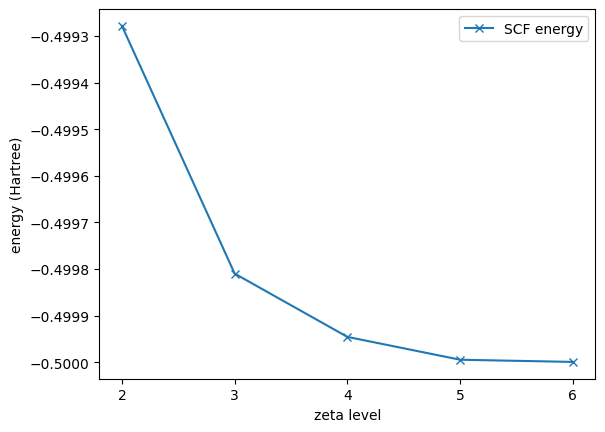

In [9]:
# define a new molecule
mol = psi4.geometry("""
0 2
H
symmetry c1
""")

basis_list = ['cc-pvdz', 'cc-pvtz', 'cc-pvqz', 'cc-pv5z', 'cc-pv6z']

energy = []
for basis in basis_list:

    options = {'basis': basis}
    en, c_a, c_b = scf_iterations(mol, options, print_level = 0)
    energy.append(en)

# zeta level, for plotting
zeta = [2, 3, 4, 5, 6]

import matplotlib.pyplot as plt

plt.figure()
plt.plot(zeta, energy, marker = 'x', label = 'SCF energy')
plt.ylabel('energy (Hartree)')
plt.xlabel('zeta level')
plt.xticks(zeta)
plt.legend()
plt.show()

## Breaking Spin Symmetry

Commuting operators can have common eigenfunctions. In non-relativistic quantum chemistry, the Hamiltonian commutes with both the spin squared ($\hat{S}^2$) and $z$-projection of spin ($\hat{S}_z$) operators, and $\hat{S}^2$ and $\hat{S}_z$, of course, also commute with one another. Hence, it is possible to find wave functions that are eigenfunctions of all three of these operators. In practical calculations, though, this is not always the case.

In Hartree-Fock theory, the wave function is not an eigenfunction of the full Hamiltonian, but it is an eigenfunction of the Fock operator, which also will commute with $\hat{S}^2$ and $\hat{S}_z$. Hence, as expected, it is possible to find Slater determinants that have well-defined spin quantum numbers. However, for the UHF approach outlined in this tutorial, there is no guarantee that the slater determinant will have a well-defined $\hat{S}^2$ value. $\hat{S}_z$ will still be a good quantum number, but we should note that there are other approaches (e.g., generalized Hartree-Fock [GHF]) that can break $S_z$ symmetry. Let's ignore such cases for now. One can expect that the UHF wave function will break $S^2$ symmetry for essentially any open-shell system (with the exception of single-electron systems), but the degree to which $S^2$ deviates from its expected value can vary. On the other hand, UHF may or may not break spin symmetry for closed shell systems. When spin-broken solutions exist, the UHF wave function is said to possess a "UHF instability." Mathematically, the presence of a UHF instability can be identified by checking the eigenvalues of the UHF orbital Hessian; negative eigenvalues indicate that a lower-energy solution exists. Many electronic structure packages include [stability analysis](https://psicode.org/psi4manual/master/scf.html#stability-analysis) for this purpose.

In order to actually find the spin-broken solution, we may need to intentially break the spin symmetry at the beginning of the UHF procedure. Again, most electronic structure packages include a flag to enable intentional spin-symmetry breaking in UHF. Let's redefine our scf_iterations() function such that it can try to break spin symmetry, based on user input. We can make use of Psi4's existing "[guess_mix](https://psicode.org/psi4manual/master/scf.html#broken-symmetry)" option. The easiest way to break spin symmetry is to modify the guess orbitals such that ${\bf c}^\alpha \neq {\bf c}^\beta$. After the core guess, we simply mix the $\beta$-spin highest occupied MO (HOMO) and lowest unoccupied MO (LUMO). 

In [10]:
def scf_iterations(mol, options, print_level = 1):
    """
    SCF iterations

    :param mol: a psi4 molecule object
    :param options: a dictionary of psi4 options
    :param print_level: the level of printing. print_level < 1 results in no printing

    :return energy: the Hartree-Fock energy
    :return c_a: the alpha-spin MO coefficient matrix
    :return c_b: the beta-spin MO coefficient matrix
    """

    if print_level > 0 :
        print('')
        print('    ==> Begin SCF Iterations <==')
        print('')
        print('     Iter               energy                   dE            ||[F,D]|| ')
        print('')

    # get required integrals, etc.
    nalpha, nbeta, enuc, h, g, S = get_integrals(mol, options)

    # slices over occupied orbitals
    oa = slice(None, nalpha)
    ob = slice(None, nbeta)

    # Lowdin's symmetric orthogonalization:
    
    # diagonalize the overlap matrix
    s, U = np.linalg.eigh(S)
    
    # inverse square root of eigenvalues of S
    Shalf = np.diagflat(s**(-0.5))
    
    # back transform to original basis
    Shalf = U @ Shalf @ U.transpose()

    # core guess
    F_a = h
    F_b = h
    
    # transform Fock matrices to the orthogonal basis
    F_a_prime = Shalf.transpose() @ F_a @ Shalf
    F_b_prime = Shalf.transpose() @ F_b @ Shalf
    
    # diaogonalize the Fock matrices
    eps_a, c_a = np.linalg.eigh(F_a_prime)
    eps_b, c_b = np.linalg.eigh(F_b_prime)
    
    # back transform the MO coefficient matrices to the non-orthogonal basis
    c_a = Shalf @ c_a
    c_b = Shalf @ c_b

    # break spin symmetry?
    if "guess_mix" in options:
        if options["guess_mix"] :
            theta = 0.25 * np.pi

            homo = c_b[:, nbeta-1]
            lumo = c_b[:, nbeta]

            c_b[:, nbeta-1] = np.cos(theta) * homo - np.sin(theta) * lumo
            c_b[:, nbeta] = np.sin(theta) * homo + np.cos(theta) * lumo
    
    # construct the density matrices
    D_a = np.einsum('pi,qi->pq', c_a[:, oa], c_a[:, oa])
    D_b = np.einsum('pi,qi->pq', c_b[:, ob], c_b[:, ob])
    
    old_energy = 0.5 * np.dot(D_a.flatten(), (h + F_a).flatten()) + 0.5 * np.dot(D_b.flatten(), (h + F_b).flatten())
    
    # DIIS solver
    diis = diis_solver(max_n_vec = 8)
    
    for iter in range (0, maxiter):
    
        # build Fock matrix using current densit matrix
    
        # Coulomb matrices
        J_a = np.einsum('rs, pqrs -> pq', D_a, g)
        J_b = np.einsum('rs, pqrs -> pq', D_b, g)
    
        # exchange matrices
        K_a = np.einsum('rs, psrq -> pq', D_a, g)
        K_b = np.einsum('rs, psrq -> pq', D_b, g)
    
        # Fock matrices
        F_a = h + J_a + J_b - K_a
        F_b = h + J_a + J_b - K_b
    
        # transform Fock matrices to the orthogonal basis
        F_a_prime = Shalf.transpose() @ F_a @ Shalf
        F_b_prime = Shalf.transpose() @ F_b @ Shalf
    
        # DIIS extrapolation
    
        # orbital gradient (error)
        e_a = Shalf.transpose() @ ( F_a @ D_a @ S - S @ D_a @ F_a ) @ Shalf
        e_b = Shalf.transpose() @ ( F_b @ D_b @ S - S @ D_b @ F_b ) @ Shalf

        # flatten error and solution matrices
        error_vector = np.hstack((e_a.flatten(), e_b.flatten()))
        soln_vector = np.hstack((F_a_prime.flatten(), F_b_prime.flatten()))
    
        # orbital gradient norm (for convergence)
        g_norm = np.linalg.norm(error_vector)

        # diis extrapolation
        soln_vector = diis.extrapolate(soln_vector, error_vector)

        # reshape flattened extrapolated solution vector
        F_a_prime = soln_vector[:int(len(F_a)**2)].reshape(len(F_a), len(F_a))
        F_b_prime = soln_vector[int(len(F_a)**2):].reshape(len(F_b), len(F_b))
    
        # diaogonalize the Fock matrices
        eps_a, c_a = np.linalg.eigh(F_a_prime)
        eps_b, c_b = np.linalg.eigh(F_b_prime)
        
        # back transform the MO coefficient matrices to the non-orthogonal basis
        c_a = Shalf @ c_a
        c_b = Shalf @ c_b
        
        # construct the density matrices
        D_a = np.einsum('pi,qi->pq', c_a[:, oa], c_a[:, oa])
        D_b = np.einsum('pi,qi->pq', c_b[:, ob], c_b[:, ob])
        
        # current energy
        energy = 0.5 * np.dot(D_a.flatten(), (h + F_a).flatten()) + 0.5 * np.dot(D_b.flatten(), (h + F_b).flatten())
        
        dE = np.abs(energy - old_energy)
        
        # when printing the energy, don't forget the nuclear repulsion contribution
        if print_level > 0 :
            print('    %5i %20.12f %20.12f %20.12f' % (iter, energy + enuc, dE, dD) )
    
        # save energy and density
        old_energy = energy
    
        if dE < e_convergence and g_norm < d_convergence:
            break
    
        iter += 1

    if print_level > 0 :
        if iter < maxiter :
            print('')
            print('    SCF iterations converged!')
            print('')
        else :
            print('')
            print('    SCF iterations did not converge...')
            print('')
        print('    * SCF total energy: %20.12f' % (energy + enuc))
        print('')

    return energy + enuc, c_a, c_b

Here, we demonstrate the onset of UHF instabilities in molecular hydrogen, H$_2$, which can be found at stretched molecular geometries. The geometry at which the UHF instability emerges is known as the "Coulson-Fischer point."  The code below will generate spin-pure and spin-broken potential energy curves for the dissociation of H$_2$, within the minimal STO-3G basis set, which only includes one $s$-type function per atom. Such a basis set is far too small for real quantum chemistry applications, but it will be useful here as we try to understand the properties of spin-pure and spin-broken solutions to the Roothaan equations.

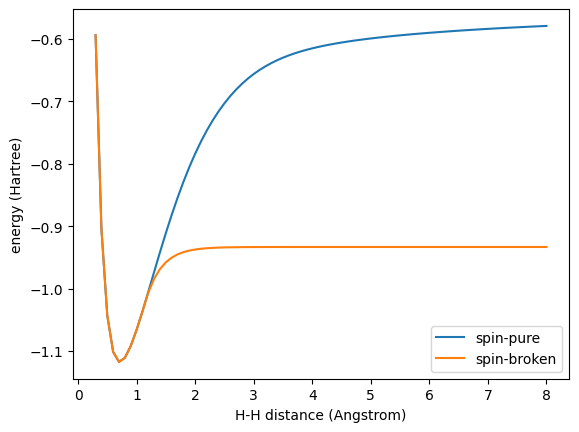

In [11]:
mol = psi4.geometry("""
0 1
H
H 1 r
symmetry c1
""")

options = {
    'basis' : 'sto-3g',
}
options_broken = {
    'basis' : 'sto-3g',
    'guess_mix' : True
}

r = np.linspace(0.3, 8, num=78)

energy = []
energy_broken = []
for my_r in r:

    # set H-H distance
    mol.r = my_r

    # UHF
    en, c_a, c_b = scf_iterations(mol, options, print_level = 0)

    # broken-symmetry UHF
    en_broken, c_a, c_b = scf_iterations(mol, options_broken, print_level = 0) 
    
    energy.append(en)
    energy_broken.append(en_broken)

plt.figure()
plt.plot(r, energy, label = 'spin-pure')
plt.plot(r, energy_broken, label = 'spin-broken')
plt.ylabel('energy (Hartree)')
plt.xlabel('H-H distance (Angstrom)')
plt.legend()
plt.show()


We can see that there are no spin-broken UHF solutions at compressed geometries. The UHF instability emerges at an H-H distance of 1.2 Å, and, in the dissociation limit, the spin-broken solution is clearly much lower in energy than the spin-pure one. The poor performance of the spin-pure solution reflects one of the primary problems with restricted Hartree-Fock theory; it cannot break bonds. To understand this behavior, let us consider the properties of the spin-pure and spin-broken Hartree-Fock wave functions for H$_2$ at an H-H distance of 8.0 Å, within the  STO-3G basis set. Let's start with the spin-pure case. 

In [12]:
mol = psi4.geometry("""
0 1
H 
H 1 8.0
symmetry c1
""")

options = {'basis': 'sto-3g'}
en, c_a, c_b = scf_iterations(mol, options, print_level = 0)

# check that the spin-pure solution looks like a "restricted" HF wave function
assert(np.allclose(c_a[:,0], c_b[:, 0]))
assert(np.allclose(c_a[:,1], c_b[:, 1]))

# print HOMO orbital
print('')
print('HOMO = %20.12f chi_1 + %20.12f chi_2' % (c_a[0, 0], c_a[1, 0] ) )
print('')


HOMO =       0.707106780895 chi_1 +       0.707106780895 chi_2



Since ${\bf c}^\alpha = {\bf c}^\beta$, we can refer to this solution as the restricted Hartree-Fock (RHF) solution. We can also see that the HOMO orbital for this spin-pure solution has equal contributions from the basis functions centered on the two hydrogen atoms. Given this form of the HOMO, we can rationalize the poor behavior of RHF in the dissociation limit. Consider the Slater determinant for H$_2$/STO-3G:

$$ 
\begin{align}
\psi({\bf x}_1, {\bf x}_2) & =  \frac{1}{\sqrt{2}} \left [\phi_1({\bf x}_1) \phi_2({\bf x}_2) - \phi_1({\bf x}_2) \phi_2({\bf x}_1) \right] \\
&= \frac{1}{\sqrt{2}} \left [\phi_{\rm HOMO}^\alpha({\bf r}_1)\alpha(\omega_1) \phi_{\rm HOMO}^\beta({\bf r}_2)\beta(\omega_2) - \phi_{\rm HOMO}^\alpha({\bf r}_2)\alpha(\omega_2) \phi_{\rm HOMO}^\beta({\bf r}_1)\beta(\omega_1) \right] \\
&= \frac{1}{\sqrt{2}} \phi_{\rm HOMO}({\bf r}_1) \phi_{\rm HOMO}({\bf r}_2) \left [ \alpha(\omega_1) \beta(\omega_2) -  \alpha(\omega_2) \beta(\omega_1)\right]
\end{align}
$$
where, in the last line, we have defined $\phi_{\rm HOMO} = \phi_{\rm HOMO}^\alpha = \phi_{\rm HOMO}^\beta$ because ${\bf c}^\alpha = {\bf c}^\beta$. The numerical results of the spin-pure SCF calculation tell us that the spatial part of this wave function can be written as

$$
\begin{align}
\phi_{\rm HOMO}({\bf r}_1) \phi_{\rm HOMO}({\bf r}_2) &= \frac{1}{2} \left [ \chi_1({\bf r}_1) + \chi_2({\bf r}_1)\right ]\left [ \chi_1({\bf r}_2) + \chi_2({\bf r}_2)\right ] \\
&= \frac{1}{2} \left [ \chi_1({\bf r}_1)\chi_2({\bf r}_2) + \chi_1({\bf r}_2)\chi_2({\bf r}_1) + \chi_1({\bf r}_1)\chi_1({\bf r}_2) + \chi_2({\bf r}_1)\chi_2({\bf r}_2) \right ]
\end{align}
$$
$\chi_1$ is an $s$-type basis function centered on one hydrogen atom and $\chi_2$ is an $s$-type basis function centered on the other hydrogen atom. As such, the third and fourth terms in this equation represent the situation where two electrons reside on only one of the atoms. We expect a homonuclear dissociation process to result in neutral fragments, so these ionic contributions to the wave function represent a qualitative failure of restricted Hartree-Fock theory to describe the dissociation limit of H$_2$. These terms are responsible for the artificially high energy of the spin-pure Hartree-Fock solution.

Now, let us consider the spin-broken case. 

In [13]:
mol = psi4.geometry("""
0 1
H 
H 1 8.0
symmetry c1
""")

options = {'basis': 'sto-3g', 'guess_mix' : True}
en, c_a, c_b = scf_iterations(mol, options, print_level = 0)

# print HOMO orbital
print('')
print('HOMO(alpha) = %20.12f chi_1 + %20.12f chi_2' % (c_a[0, 0], c_a[1, 0] ) )
print('HOMO(beta)  = %20.12f chi_1 + %20.12f chi_2' % (c_b[0, 0], c_b[1, 0] ) )
print('')



HOMO(alpha) =       0.000000003107 chi_1 +       1.000000000000 chi_2
HOMO(beta)  =      -1.000000000000 chi_1 +      -0.000000003107 chi_2



Clearly, $\phi_{\rm HOMO}^\alpha \neq \phi_{\rm HOMO}^\beta$. $\phi_{\rm HOMO}^\alpha$ is centered purely at hydrogen atom number two, while $\phi_{\rm HOMO}^\beta$ is centered at hydrogen atom one. Now, consider the Slater determinant for this UHF solution
$$ 
\begin{align}
\psi({\bf x}_1, {\bf x}_2) & =  \frac{1}{\sqrt{2}} \left [\phi_1({\bf x}_1) \phi_2({\bf x}_2) - \phi_1({\bf x}_2) \phi_2({\bf x}_1) \right] \\
&= \frac{1}{\sqrt{2}} \left [\phi_{\rm HOMO}^\alpha({\bf r}_1)\alpha(\omega_1) \phi_{\rm HOMO}^\beta({\bf r}_2)\beta(\omega_2) - \phi_{\rm HOMO}^\alpha({\bf r}_2)\alpha(\omega_2) \phi_{\rm HOMO}^\beta({\bf r}_1)\beta(\omega_1) \right] \\
&= -\frac{1}{\sqrt{2}} \left [\chi_2({\bf r}_1) \chi_1({\bf r}_2) \alpha(\omega_1)\beta(\omega_2) - \chi_2({\bf r}_2) \chi_1({\bf r}_1) \alpha(\omega_2)\beta(\omega_1)   \right] \\
\end{align}
$$

As we can see, the spin-broken solution includes no ionic contributions at the dissociation limit, which is why this solution gives much more reasonable energetics than the spin-pure one in this limit.